In [35]:
import torch
from torch.utils.data import Dataset
import pandas as pd

class EEGDataset(Dataset):
    def __init__(self, data_file, events_file, window_size=150):
        self.data = pd.read_csv(data_file)
        self.events = pd.read_csv(events_file)
        self.window_size = window_size
        
        # Drop the 'id' column from the data
        self.data = self.data.drop(columns=['id'])
        self.events = self.events.drop(columns= ['id'])
        # Convert the data to float32
        self.data = self.data.astype('float32')
        
        # Convert the events to int64
        self.events = self.events.astype('int64')
        
    def __len__(self):
        return len(self.data) - self.window_size + 1
    
    def __getitem__(self, idx):
        # Get the window of data
        data_window = self.data.iloc[idx].values
        
        # Transpose the data to get the shape (32, 150)
        data_window = data_window.T
        
        # Get the corresponding event label
        event_label = self.events.iloc[idx].values
        
        return torch.from_numpy(data_window), torch.from_numpy(event_label)

In [36]:
ds_train = EEGDataset("./data/train/subj1_series1_data.csv","./data/train/subj1_series1_events.csv")

In [40]:
ds_train[1126]


(tensor([ 454.,  646.,  824.,  520.,  286.,  481.,  832.,  801.,  174.,  233.,
          769.,  382.,  481.,  255.,  798., 1100.,  796.,  527.,  416.,  674.,
          734.,  736., 1129.,  745.,  695.,  609., 1093.,  877.,  953.,  615.,
          596., 1053.]),
 tensor([1, 0, 0, 0, 0, 0]))

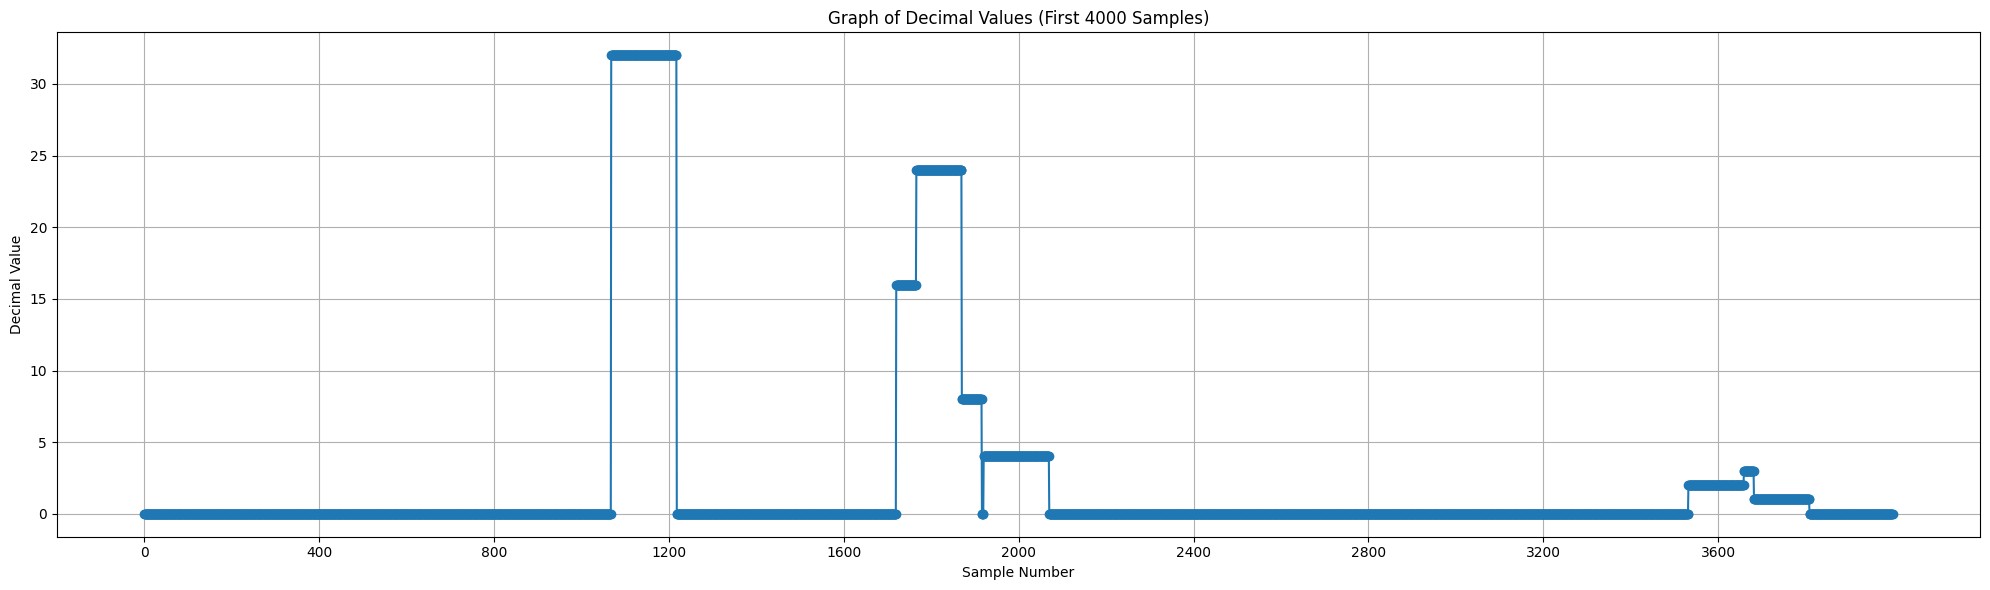

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data
data = pd.read_csv('./data/train/subj1_series1_events.csv')

# Remove the 'id' column
data = data.drop('id', axis=1)

# Convert the binary labels to decimal values
data['decimal_value'] = data.apply(lambda row: int(''.join(map(str, row)), 2), axis=1)

# Select the first 2000 samples
data_4000 = data.iloc[:4000]

# Plot the graph for the first 4000 samples
plt.figure(figsize=(20, 6))
plt.plot(data_4000['decimal_value'], marker='o')
plt.xlabel('Sample Number')
plt.ylabel('Decimal Value')
plt.title('Graph of Decimal Values (First 4000 Samples)')
plt.xticks(range(0, 4000, 400))
plt.grid(True)
plt.tight_layout()
plt.show()